In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.neural_network import MLPClassifier
import xgboost as xgb



##**DATA PREP**##

In [ ]:
df=pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
print(df.isnull().sum())
print(df.head())
print(df.info())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.

In [ ]:
print(df['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [ ]:
df.rename(columns = {'Diabetes_012':'class'}, inplace = True)
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

###**EDA**###

In [ ]:
print(df.describe())

               class         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [ ]:
# Class Distribution Analysis
print("\nClass Distribution:")
class_counts = df['class'].value_counts()
class_proportions = df['class'].value_counts(normalize=True)
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)


Class Distribution:
class
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Class Proportions:
class
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


In [ ]:
from scipy.stats import f_oneway
for feature in X.columns:
    groups = df['class'].unique()
    group_data = [df[feature][df['class'] == g] for g in groups]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*group_data)
    print(f"\n--- ANOVA Test: {feature} vs. class ---")
    print(f"F Statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Statistically significant difference between group means (p < 0.05)")
    else:
        print("No statistically significant difference between group means (p >= 0.05)")


--- ANOVA Test: HighBP vs. class ---
F Statistic: 10149.1404
P-value: 0.0000
Statistically significant difference between group means (p < 0.05)

--- ANOVA Test: HighChol vs. class ---
F Statistic: 5890.8432
P-value: 0.0000
Statistically significant difference between group means (p < 0.05)

--- ANOVA Test: CholCheck vs. class ---
F Statistic: 589.5957
P-value: 0.0000
Statistically significant difference between group means (p < 0.05)

--- ANOVA Test: BMI vs. class ---
F Statistic: 6768.3611
P-value: 0.0000
Statistically significant difference between group means (p < 0.05)

--- ANOVA Test: Smoker vs. class ---
F Statistic: 507.2706
P-value: 0.0000
Statistically significant difference between group means (p < 0.05)

--- ANOVA Test: Stroke vs. class ---
F Statistic: 1475.3216
P-value: 0.0000
Statistically significant difference between group means (p < 0.05)

--- ANOVA Test: HeartDiseaseorAttack vs. class ---
F Statistic: 4260.8792
P-value: 0.0000
Statistically significant difference b

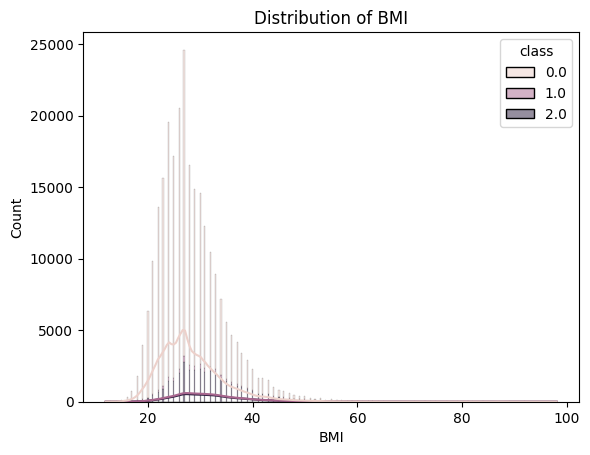

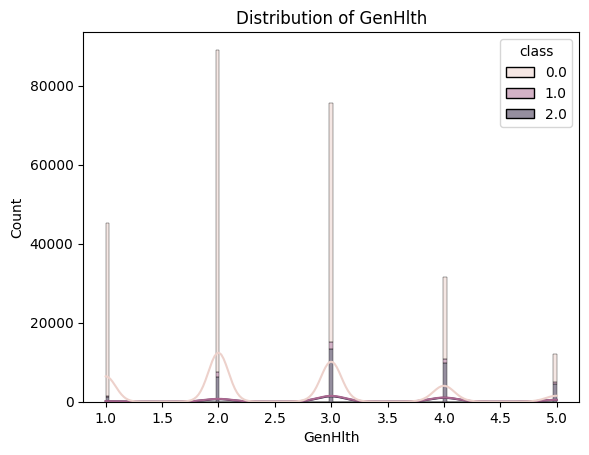

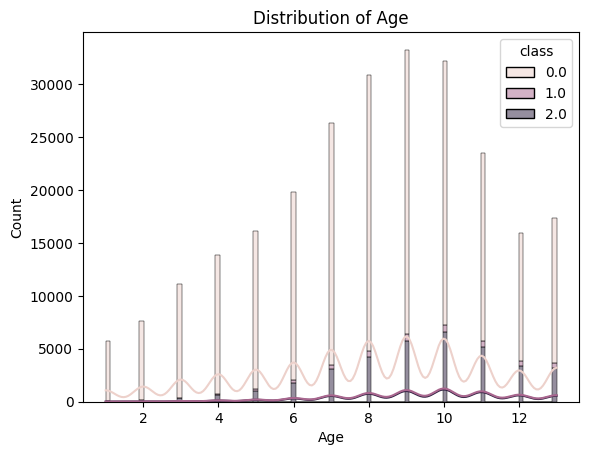

In [ ]:
# Histograms
for col in ['BMI', 'GenHlth', 'Age']:
    plt.figure()
    sns.histplot(data=df, x=col, hue='class', kde=True, multiple="stack")
    plt.title(f'Distribution of {col}')
    plt.show()

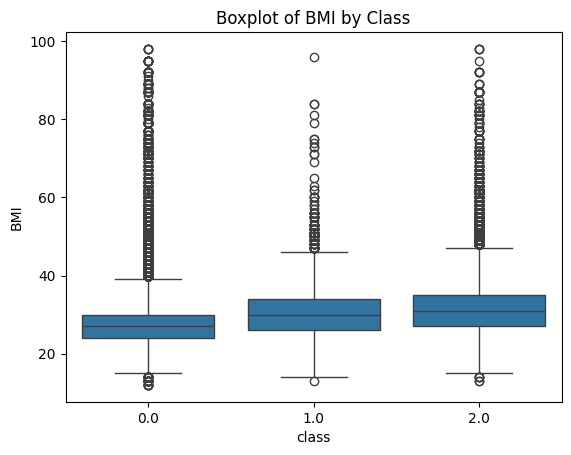

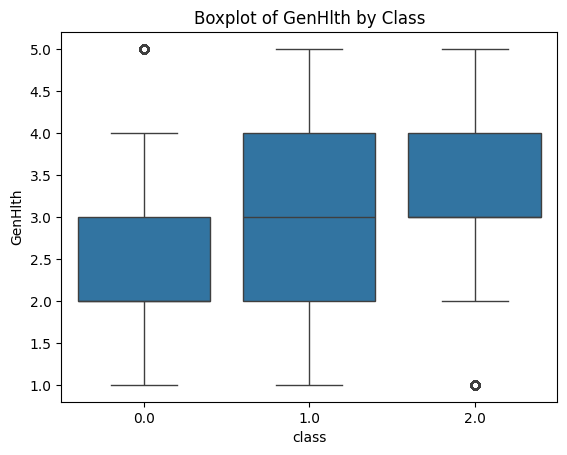

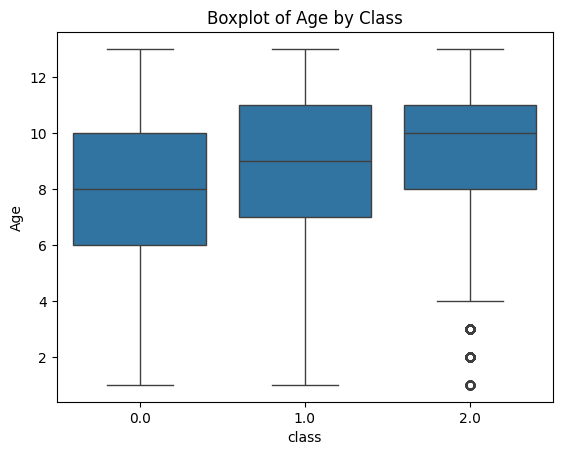

In [ ]:
# Box plots
for col in ['BMI', 'GenHlth', 'Age']:
    plt.figure()
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()

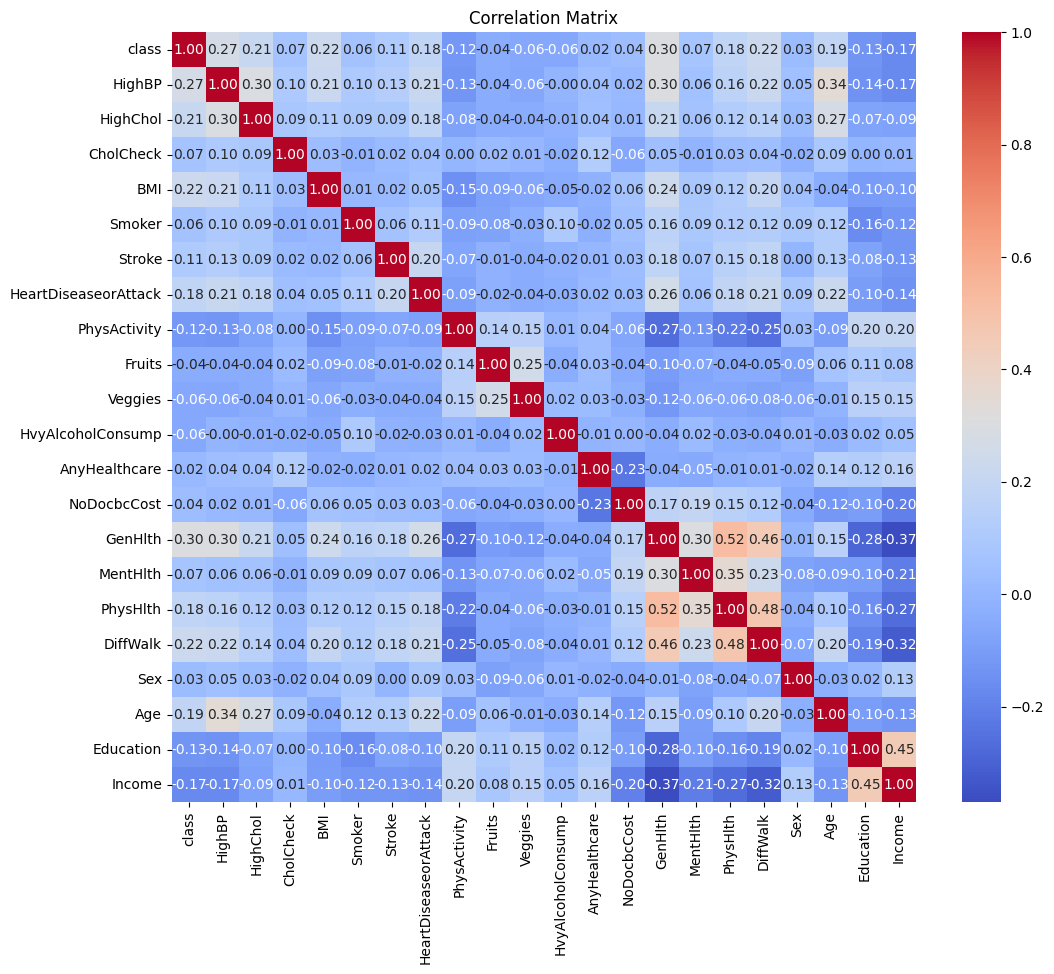

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Chi-square test
chi2_selector = SelectKBest(chi2)
chi2_selector.fit(X_train, y_train)
chi2_scores = pd.Series(chi2_selector.scores_, index=X_train.columns)
print("\nChi-Square Scores:")
print(chi2_scores.sort_values(ascending=False))


Chi-Square Scores:
PhysHlth                92635.798182
MentHlth                15894.387924
BMI                     12876.476309
HighBP                   6926.869689
DiffWalk                 6896.337480
GenHlth                  6893.944889
Age                      6598.169682
HeartDiseaseorAttack     4841.642911
HighChol                 4173.975021
Income                   3468.824993
Stroke                   1769.635496
PhysActivity              613.030454
Education                 543.454121
HvyAlcoholConsump         520.310325
Smoker                    378.664856
NoDocbcCost               234.716730
Fruits                    109.589039
Veggies                   101.232093
Sex                        97.156542
CholCheck                  29.087715
AnyHealthcare               2.250264
dtype: float64


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
fvalue_selector = SelectKBest(f_classif)
fvalue_selector.fit(X_train, y_train)
fvalue_scores = pd.Series(fvalue_selector.scores_, index=X_train.columns)
print("\nF-value Scores:")
print(fvalue_scores.sort_values(ascending=False))


F-value Scores:
GenHlth                 8352.437479
HighBP                  6550.116143
BMI                     4401.596424
DiffWalk                4374.744602
HighChol                3798.247891
Age                     2940.010738
HeartDiseaseorAttack    2764.933361
PhysHlth                2667.768482
Income                  2513.581121
Education               1432.821875
PhysActivity            1279.198990
Stroke                   932.741971
MentHlth                 463.165577
CholCheck                388.045757
Smoker                   342.706605
HvyAlcoholConsump        276.485777
Veggies                  269.759348
Fruits                   150.228622
NoDocbcCost              128.270695
Sex                       86.756718
AnyHealthcare             23.000903
dtype: float64


###**PIPELINE**###

In [ ]:
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

smote = SMOTE(random_state=42)

# Feature selection
feature_selector = SelectKBest(chi2)

In [ ]:
#  Logistic Regression
pipeline_lr = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', SelectKBest(chi2)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'))
])

In [ ]:
# Random Forest
pipeline_rf = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', SelectKBest(chi2)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Gradient Boosting (XGBoost)
import xgboost as xgb
pipeline_xgb = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('feature_selection', SelectKBest(chi2)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

###**Model Training**###

In [38]:
def tuned_model(pipeline, param_grid, X_train, y_train, n_iter=10):
    """
    Performs hyperparameter tuning using RandomizedSearchCV with reduced iterations
    and parallel processing.
    """
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    recall_scorer = make_scorer(recall_score, zero_division=0, average='macro')

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        cv=kfold,
        scoring=recall_scorer,
        verbose=1,
        n_jobs=-1,
        n_iter=n_iter,
        random_state=42,
        error_score=0
    )
    search.fit(X_train, y_train)
    print(f"Best parameters: {search.best_params_}")
    print(f"Best cross-validation score (macro recall): {search.best_score_:.4f}")
    return search.best_estimator_


#Hyperparameter Grids

param_grid_lr = {
    'feature_selection__k': [7, 'all'],
    'classifier__C': [0.01, 1],
    'classifier__penalty': ['l2']
}

param_grid_rf = {
    'feature_selection__k': [7, 'all'],
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_split': [2, 5]
}

param_grid_xgb = {
    'feature_selection__k': [7, 'all'],
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 4],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]
}

param_grid_mlp = {
    'feature_selection__k': [7, 'all'],
    'classifier__hidden_layer_sizes': [(64, 32)],
    'classifier__alpha': [0.001, 0.01],
    'classifier__learning_rate_init': [0.001]
}


# Tune Models
print("Tuning Logistic Regression...")
best_lr = tuned_model(pipeline_lr, param_grid_lr, X_train, y_train, n_iter=4)

print("\nTuning Random Forest...")
best_rf = tuned_model(pipeline_rf, param_grid_rf, X_train, y_train, n_iter=4)

print("\nTuning XGBoost...")
best_xgb = tuned_model(pipeline_xgb, param_grid_xgb, X_train, y_train, n_iter=4)

Tuning Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'feature_selection__k': 'all', 'classifier__penalty': 'l2', 'classifier__C': 1}
Best cross-validation score (macro recall): 0.5144

Tuning Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'feature_selection__k': 7, 'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__max_depth': 5}
Best cross-validation score (macro recall): 0.4997

Tuning XGBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:29:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'feature_selection__k': 7, 'classifier__scale_pos_weight': 1, 'classifier__n_estimators': 50, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.2}
Best cross-validation score (macro recall): 0.4971


###**PyTorch**###

In [ ]:
!pip install torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 776.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
class DiabetesDataset(Dataset):
    def __init__(self, X, y, preprocessor=None):
        if preprocessor:
            X = preprocessor.fit_transform(X, y)
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train, y_train)
X_val_processed = preprocessor.transform(X_val)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

train_dataset = DiabetesDataset(X_train_resampled, y_train_resampled, preprocessor=None)
val_dataset = DiabetesDataset(X_val_processed, y_val, preprocessor=None)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, num_classes=3):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(X_train_resampled.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
epochs = 10
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_losses = []
        all_preds = []
        all_probs = []
        all_labels = []
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_losses.append(val_loss.item())
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            all_probs.extend(probs)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {np.mean(val_losses):.4f}')

all_preds = np.array(all_preds)
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

print("--- PyTorch MLP ---")
print(classification_report(all_labels, all_preds))
print(f"ROC AUC (One-vs-Rest): {roc_auc_score(all_labels, all_probs, multi_class='ovr')}")


Epoch 1/10, Training Loss: 1.9251, Validation Loss: 0.8068
Epoch 2/10, Training Loss: 0.7100, Validation Loss: 0.7986
Epoch 3/10, Training Loss: 0.4594, Validation Loss: 0.8006
Epoch 4/10, Training Loss: 0.4531, Validation Loss: 0.8094
Epoch 5/10, Training Loss: 0.4930, Validation Loss: 0.7755
Epoch 6/10, Training Loss: 0.5347, Validation Loss: 0.7554
Epoch 7/10, Training Loss: 0.3439, Validation Loss: 0.8082
Epoch 8/10, Training Loss: 0.8364, Validation Loss: 0.7689
Epoch 9/10, Training Loss: 0.6965, Validation Loss: 0.8232
Epoch 10/10, Training Loss: 0.3391, Validation Loss: 0.8188
--- PyTorch MLP ---
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     34193
           1       0.02      0.25      0.05       741
           2       0.32      0.59      0.41      5655

    accuracy                           0.61     40589
   macro avg       0.43      0.49      0.40     40589
weighted avg       0.84      0.61      0.69     40589

ROC AUC 

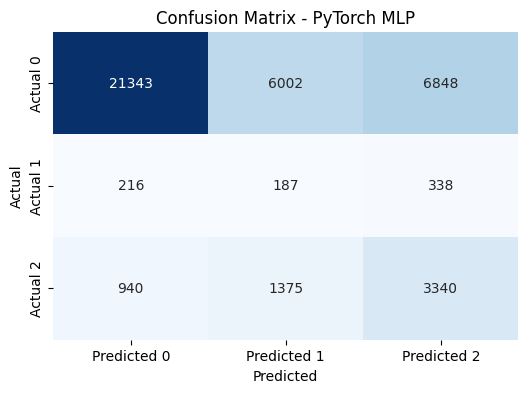

In [ ]:
# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - PyTorch MLP')
plt.show()


In [43]:
def evaluate_pipeline(pipeline, X_test, y_test, title):
    """
    Evaluates a given pipeline using the provided test data.
    Prints the classification report and ROC AUC score.

    Args:
        pipeline: The trained pipeline.
        X_test: The features of the test data.
        y_test: The labels of the test data.
        title: A descriptive title for the output.
    """
    from sklearn.metrics import classification_report, roc_auc_score

    y_pred = pipeline.predict(X_test)
    y_probs = pipeline.predict_proba(X_test)

    print(f"\n--- {title} ---")
    print(classification_report(y_test, y_pred))
    try:
        roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
        print(f"ROC AUC (One-vs-Rest): {roc_auc:.4f}")
    except ValueError:
        print("ROC AUC not calculated")

In [45]:
best_model = best_lr
evaluate_pipeline(best_model, X_test, y_test, "Best Model - Test Set")


--- Best Model - Test Set ---
              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79     42741
         1.0       0.03      0.28      0.06       926
         2.0       0.35      0.59      0.44      7069

    accuracy                           0.66     50736
   macro avg       0.44      0.52      0.43     50736
weighted avg       0.85      0.66      0.73     50736

ROC AUC (One-vs-Rest): 0.7683
